# Graph Demo

Resource: https://www.datacamp.com/community/tutorials/social-network-analysis-python

In [1]:
!pip install networkx

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



     ---------------------------------------- 2.0/2.0 MB 233.6 kB/s eta 0:00:00


In [2]:
import networkx as nx
import matplotlib

## Graph Creation

Let's first create an undirected graph where the nodes represent actors, and the edges represent who they've worked with.

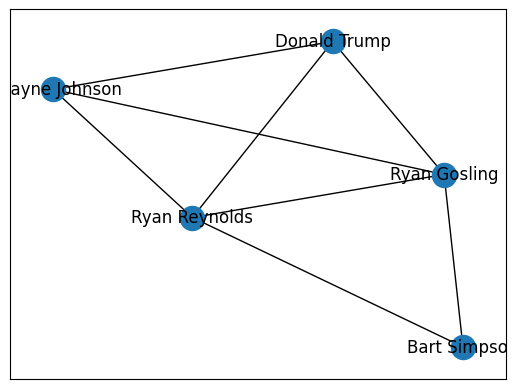

In [3]:
import networkx as nx
import matplotlib

G_undir = nx.Graph() #undirected graph

G_undir.add_edge('Ryan Reynolds','Ryan Gosling')
G_undir.add_edge('Ryan Reynolds','Dwayne Johnson')
G_undir.add_edge('Ryan Reynolds','Bart Simpson')
G_undir.add_edge('Ryan Reynolds','Donald Trump')
G_undir.add_edge('Ryan Gosling','Dwayne Johnson')
G_undir.add_edge('Ryan Gosling','Bart Simpson')
G_undir.add_edge('Ryan Gosling','Donald Trump')
G_undir.add_edge('Donald Trump','Dwayne Johnson')

nx.draw_networkx(G_undir) #view the graph

Next let's create a directed graph that represents a food chain.

In [4]:
#creates a directed graph (di-graph) 
#directed graph
G_dir = nx.DiGraph()
G_dir.add_edge('Grass','Mouse')
G_dir.add_edge('Grass','Rabbit')
G_dir.add_edge('Rabbit','Hawk')
G_dir.add_edge('Mouse','Hawk')
G_dir.add_edge('Mouse','Snake')
G_dir.add_edge('Snake','Hawk')
G_dir.add_edge('Hawk','Snake')
G_dir.add_edge('Hawk','Hawk')

We can use the `draw_networkx()` function as before. However, it is possible that nodes do not separate out and are distinctly visible in the network drawn. To take care of this, we can use the `spring_layout()` function to force a layout, which positions the nodes in a manner that we can distinctly see them.

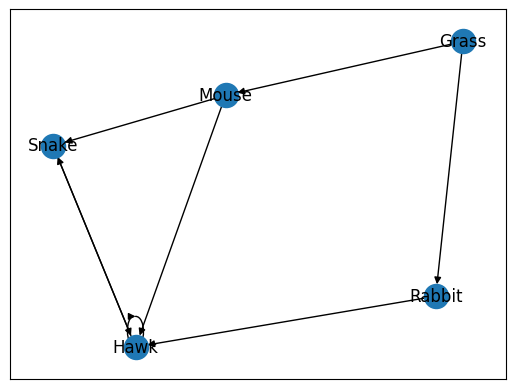

In [5]:
pos = nx.spring_layout(G_dir, seed=7)
nx.draw_networkx(G_dir, pos)

If in our initial network (with actors) we consider the number of movies done together as a weight, we will get a Weighted Graph. Let us again make a graph of the actors, but this time we will add weights to the graph, where each edge has a weight signifying the number of movies they have done together.

> Note: Higher weight will be visualized via closer nodes

In [6]:
G_weighted = nx.Graph()

#notice all donald trumps weights are 1
G_weighted.add_edge('Ryan Reynolds','Ryan Gosling', weight=25)
G_weighted.add_edge('Ryan Reynolds','Dwayne Johnson', weight=8)
G_weighted.add_edge('Ryan Reynolds','Bart Simpson', weight=11)
G_weighted.add_edge('Ryan Reynolds','Donald Trump', weight=1)
G_weighted.add_edge('Ryan Gosling','Dwayne Johnson', weight=4)
G_weighted.add_edge('Ryan Gosling','Bart Simpson',weight=7)
G_weighted.add_edge('Ryan Gosling','Donald Trump', weight=1)
G_weighted.add_edge('Donald Trump','Dwayne Johnson',weight=1)
G_weighted.add_edge('Ryan Reynolds','Brad Pitt',weight=10)
G_weighted.add_edge('George Clooney','Brad Pitt',weight=10)

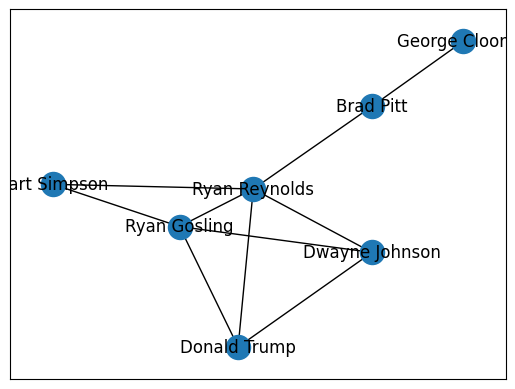

In [7]:
pos = nx.spring_layout(G_weighted, seed=1)
nx.draw_networkx(G_weighted, pos)

## Graph Analysis
Let's next looks at some metrics that measure connectivity and centrality.
### Connectivity

We can calculate the degree (number of edges) of a node using the `degree()` function.

In [8]:
print(nx.degree(G_weighted, 'Dwayne Johnson'))
print(nx.degree(G_weighted, 'Ryan Gosling'))

3
4


One metric for clustering is the **Local Clustering Coefficient**, which is the fraction of pairs of the node's connections that are connected with each other. To determine the local clustering coefficient, we make use of `nx.clustering(Graph, Node)` function.

In [9]:
print(nx.clustering(G_weighted, 'Dwayne Johnson'))
print(nx.clustering(G_weighted, 'Ryan Reynolds'))

1.0
0.4


How is the Ryan Reynold's 0.4 calculated? Ryan Reynolds is connected with five people: Dwayne Johnson, Donald Trump, Ryan Gosling, Bart Simpson, Brad Pitt. So there are 10 possible pairings:
- DJ, DT (yes)
- DJ, RG (yes)
- DJ, BS (no)
- DJ, BP (no)
- DT, RG (yes)
- DT, BS (no)
- DT, BP (no)
- RG, BS (yes)
- RG, BP (no)
- BS, BP (no)

4/10 or 0.4 of these pairs are connected.

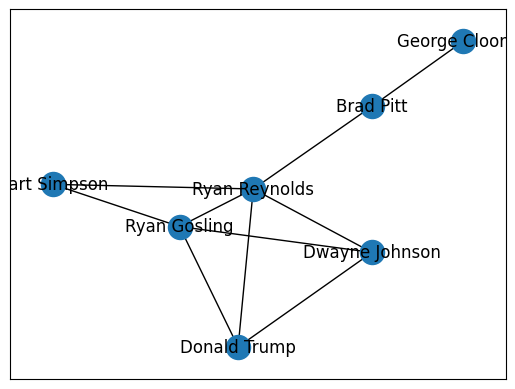

In [10]:
pos = nx.spring_layout(G_weighted, seed=1)
nx.draw_networkx(G_weighted, pos) #reprint the graph

There is also the **average clustering coefficient**, which is the sum of all the local clustering coefficients, divided by the number of nodes.

In [11]:
nx.average_clustering(G_weighted)

0.5809523809523809

We can also determine the shortest path between two nodes and its length in `NetworkX` using `nx.shortest_path(Graph, Node1, Node2)` and `nx.shortest_path_length(Graph, Node1, Node2)` functions respectively.

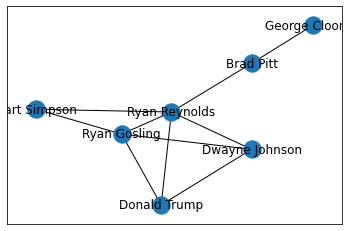

In [11]:
pos = nx.spring_layout(G_weighted, seed=1)
nx.draw_networkx(G_weighted, pos) #reprint the graph

In [12]:
nx.shortest_path(G_weighted, "Bart Simpson", "Donald Trump") #prefers highest weight?

['Bart Simpson', 'Ryan Reynolds', 'Donald Trump']

In [13]:
nx.shortest_path_length(G_weighted, "Bart Simpson", "Donald Trump")

2

Many of the default networkx functions ignore weighted edges unless specified in the function.

In [14]:
nx.shortest_path(G_weighted, "Bart Simpson", "Donald Trump", weight='weight') #shortest path according to weight

['Bart Simpson', 'Ryan Gosling', 'Donald Trump']

In [15]:
nx.shortest_path_length(G_weighted, "Bart Simpson", "Donald Trump", weight='weight') #weight of shortest path according to weight

8

### Centrality
Next we will learn how to find the most important nodes in a graph. Because we can define "importance" in different ways, we have many **centrality measures**.

**Degree centrality** is a measure of the number of connections a particular node has in a graph (as a percentage). It is based on the fact that important nodes have many connections. `NetworkX` has the function `degree_centrality()` to calculate the degree centrality of all the nodes of a network.

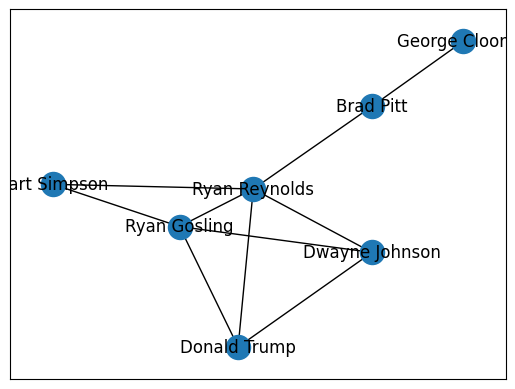

In [13]:
pos = nx.spring_layout(G_weighted, seed=1)
nx.draw_networkx(G_weighted, pos) #reprint the graph

In [14]:
nx.degree_centrality(G_weighted)

{'Ryan Reynolds': 0.8333333333333333,
 'Ryan Gosling': 0.6666666666666666,
 'Dwayne Johnson': 0.5,
 'Bart Simpson': 0.3333333333333333,
 'Donald Trump': 0.5,
 'Brad Pitt': 0.3333333333333333,
 'George Clooney': 0.16666666666666666}

It is not just how many nodes one is connected to, but the importance of the nodes that one is connected with that can decide the importance of a node. **Eigenvector centrality** is a measure of exactly this. It decides that a node is important if it is connected to other important nodes. We can use the `eigenvector_centrality()` function of `NetworkX` to calculate eigenvector centrality of all the nodes in a network.

In [16]:
nx.eigenvector_centrality(G_weighted)

{'Ryan Reynolds': 0.5293817686437329,
 'Ryan Gosling': 0.4908973939969572,
 'Dwayne Johnson': 0.42310142991864325,
 'Bart Simpson': 0.2990769632218074,
 'Donald Trump': 0.42310142991864325,
 'Brad Pitt': 0.16976855909271943,
 'George Clooney': 0.049766032691304}

Compare Brad Pitt and Bart Simpson's degree centrality and eigenvector centrality.

Remember, graph is treated as unweighted by default. Compare Donald Trump and Dwayne Johnson.

In [15]:
nx.eigenvector_centrality(G_weighted, weight='weight')

{'Ryan Reynolds': 0.6619793976154829,
 'Ryan Gosling': 0.5871636976067025,
 'Dwayne Johnson': 0.22730110270329254,
 'Bart Simpson': 0.33680377750974183,
 'Donald Trump': 0.043651250685523946,
 'Brad Pitt': 0.2144616342065296,
 'George Clooney': 0.0634055934248457}


The **Betweenness Centrality** is the centrality of control. It quantifies how many times a particular node comes in the shortest chosen path between two other nodes. The nodes with high betweenness centrality play a significant role in the communication/information flow within a graph. The nodes with high betweenness centrality can have a strategic control and influence on others. An individual at such a strategic position can influence the whole group, by either withholding or coloring the information in transmission.

`Networkx` has the function `betweenness_centrality()` to measure it for the network. It has options to select if we want betweenness values to be normalized or not, weights to be included in centrality calculation or not, and to include the endpoints in the shortest path counts or not.

In [20]:
nx.betweenness_centrality(G_weighted) # of all the shortest paths, how often does each node land on the shortest path?

{'Ryan Reynolds': 0.6,
 'Ryan Gosling': 0.06666666666666667,
 'Dwayne Johnson': 0.0,
 'Bart Simpson': 0.0,
 'Donald Trump': 0.0,
 'Brad Pitt': 0.3333333333333333,
 'George Clooney': 0.0}

In [21]:
nx.betweenness_centrality(G_weighted, weight='weight')

{'Ryan Reynolds': 0.5333333333333333,
 'Ryan Gosling': 0.3333333333333333,
 'Dwayne Johnson': 0.0,
 'Bart Simpson': 0.0,
 'Donald Trump': 0.7333333333333333,
 'Brad Pitt': 0.3333333333333333,
 'George Clooney': 0.0}